# Assignment 5: CART methodology Implementation
   ## Name: Atharv Subhekar
   ### CWID: 20015840

In [48]:
#import preprocessing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#algorithm libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Metrics libraries
from sklearn.metrics import accuracy_score

### Data Processing

In [57]:
# loading the dataset in pandas
df = pd.read_csv("breast-cancer-wisconsin.csv")
df

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [58]:
# storing the target labels
target = df.iloc[:,-1]
target

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [59]:
#Dropping the unnecessary columns 
df = df.drop(columns = ['Sample','Class'])
df.shape

(699, 9)

In [60]:
# Converting the missing values denoted by '?' to NaN
df = df.replace({'?': np.NaN})
# Replacing NaN values with the mean values.
df["F6"] = pd.to_numeric(df["F6"])
df['F6'].fillna(df['F6'].mean(), inplace=True)
df['F6'].isnull().sum()

0

In [61]:
#Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3)

### Decision Tree Classifier

In [62]:
def decision_tree():
    #Initializing the model 
    decision_tree = DecisionTreeClassifier()
    #Fitting the model on training data
    decision_tree.fit(X_train,y_train)
    #Predicting the labels values using the test data
    y_pred = decision_tree.predict(X_test)
    #Evaluating the model
    dtree_accuracy = accuracy_score(y_pred, y_test)
    
    plt.plot(decision_tree.feature_importances_, 'o')
    plt.xticks(range(df.shape[1]), df.columns, rotation=90)
    plt.ylim(0, 1)
    return dtree_accuracy

### Evaluating performance and plotting feature importance for data visualization.

 Decision Tree accuracy without knowing the important features =  0.9523809523809523

 Feature importance = 


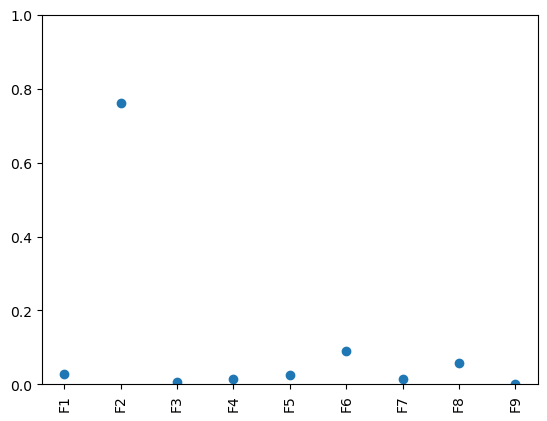

In [63]:
dtree_accuracy = decision_tree()
print(" Decision Tree accuracy without knowing the important features = ", dtree_accuracy)
print("\n Feature importance = ")

### Retraining the data with the important features

In [78]:
cart = DecisionTreeClassifier(max_depth = 3)
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)
cart_accuracy = accuracy_score(y_pred_cart, y_test)
print("CART accuracy after knowing the important features = ", cart_accuracy)


CART accuracy after knowing the important features =  0.9571428571428572


### Building the Tree Diagram


[Text(0.5, 0.875, 'X[1] <= 2.5\ngini = 0.457\nsamples = 489\nvalue = [316, 173]'),
 Text(0.25, 0.625, 'X[7] <= 3.5\ngini = 0.065\nsamples = 296\nvalue = [286, 10]'),
 Text(0.125, 0.375, 'X[4] <= 5.5\ngini = 0.021\nsamples = 287\nvalue = [284, 3]'),
 Text(0.0625, 0.125, 'gini = 0.007\nsamples = 285\nvalue = [284, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.375, 'X[5] <= 3.0\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.625, 'X[5] <= 3.772\ngini = 0.263\nsamples = 193\nvalue = [30, 163]'),
 Text(0.625, 0.375, 'X[1] <= 4.5\ngini = 0.49\nsamples = 56\nvalue = [24, 32]'),
 Text(0.5625, 0.125, 'gini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.6875, 0.125, 'gini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.875, 0.375, 'X[5] <= 8.5\ngini = 0.084\nsamples = 137\nvalue = [6, 131]'),
 Text(0.8125, 0.1

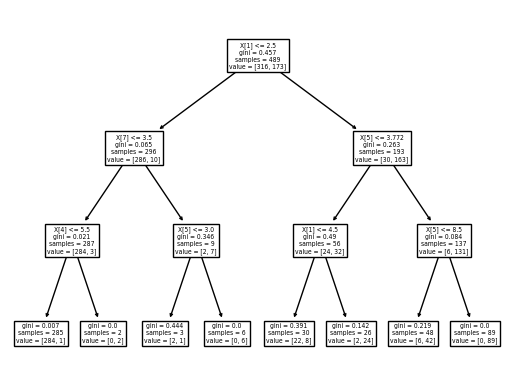

In [79]:
tree.plot_tree(cart)